In [2]:
#library 
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#modify data 
numerics = {'int64', 'float64'}
train_numbers = train.select_dtypes(include = numerics)
test_numbers = test.select_dtypes(include = numerics)

#prepare independent and target 
x = train_numbers.drop(['SalePrice'],axis=1)
y = train_numbers['SalePrice']
x= x.fillna(0)

In [4]:
#put 33% of the data randomly into the testing part
#compare the y_train to y_test to confirm the accuracy of the algorith
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [39]:
train_mse = []
test_mse = []
K = []
for k in range(1,21):
    #print('K = {0}, format(k))
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_train, y_train)
    y_test_predict = knn.predict(x_test)
    vali_mse = mean_squared_error(y_test, y_test_predict)
    test_mse.append(vali_mse)
    y_train_predict = knn.predict(x_train)
    tr_mse = mean_squared_error(y_train, y_train_predict)
    train_mse.append(tr_mse)
    K.append(k)
    #print("when K = {2}, train MSE = {0}, test MSE = {1}".format(tr_mse, vali_mse, k))



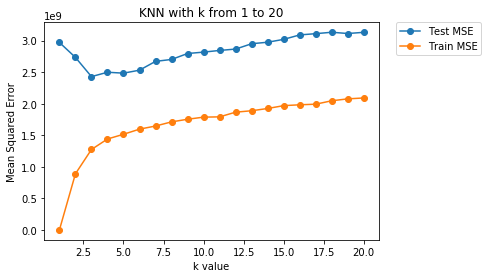

In [64]:
#plot
plt.plot(K, test_mse, '-o', label = 'Test MSE')
plt.plot(K, train_mse, '-o', label = 'Train MSE')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.xlabel("k value")
plt.ylabel("Mean Squared Error")
plt.title("KNN with k from 1 to 20")
plt.show()